![copyright](logo.png "Copyright (c) 2017, Bas Hoonhout")

<div style="text-align: right"> Aeolis workshop material Copyright (c) 2017, Bas Hoonhout </div>
<div style="text-align: right"> 2023, Aeolis developer team </div>



# Purpose

This notebook reproduces figure ?? in de Vries et al 2023.

# Run AeoLiS to generate data

- Leave this notebook and switch to your terminal.
- Navigate to the model schematizations.
- Run the following command:

  ``aeolis Run1.txt``


If it is done you can continue reading the model output!

notes during my models setup:
- let's start with a 100m wide beach with a 20m intertidal zone which is consistent with de Vries et. al. 2014.
- let's add an alonshore dimension of 1000m.


In [2]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook


In [12]:
# generate grids
[y_grid,x_grid] = np.mgrid[0:10,0:100]
#create zgrid between -1 and 9 so with a tide range of 1m there is 20m of intertidal zone. 
z_grid = np.tile(np.linspace(-1,9,100),(np.shape(x_grid)[0],1))

# save grid to files
np.savetxt('x_grid.txt',x_grid,fmt='%.d')
np.savetxt('y_grid.txt',y_grid,fmt='%.d')
np.savetxt('z_grid.txt',z_grid,fmt='%.5f')

supply = np.zeros(np.shape(x_grid)) 
#supply[:,0:20] = 0.00006
supply[:,0:21] = 0.0015
np.savetxt('supply_large_file.txt',supply,fmt='%.5f')

#generate windfile
angle = 0.
speed = 9.
# np.savetxt('wind.txt',[[0, 8, angle],
#                        [40, 8, angle],
#                        [41, 6, angle],
#                        [55, 6, angle],
#                        [56, 9, angle],
#                        [300, 9, angle]],
#                        fmt=('%.d %.d %.d'))
np.savetxt('wind.txt',[[0, speed, angle],[10, speed, angle]], fmt=('%.d %.d %.d'))

#make a tide file
period = 44700
tide_time = np.linspace(0,period,int(np.round(period/1)+1))
tide= np.cos((tide_time/period)*2*np.pi)

np.savetxt('tide.txt',np.transpose(np.stack([tide_time,tide])),fmt='%.5f')


(176, 10, 100, 1)


<IPython.core.display.Javascript object>


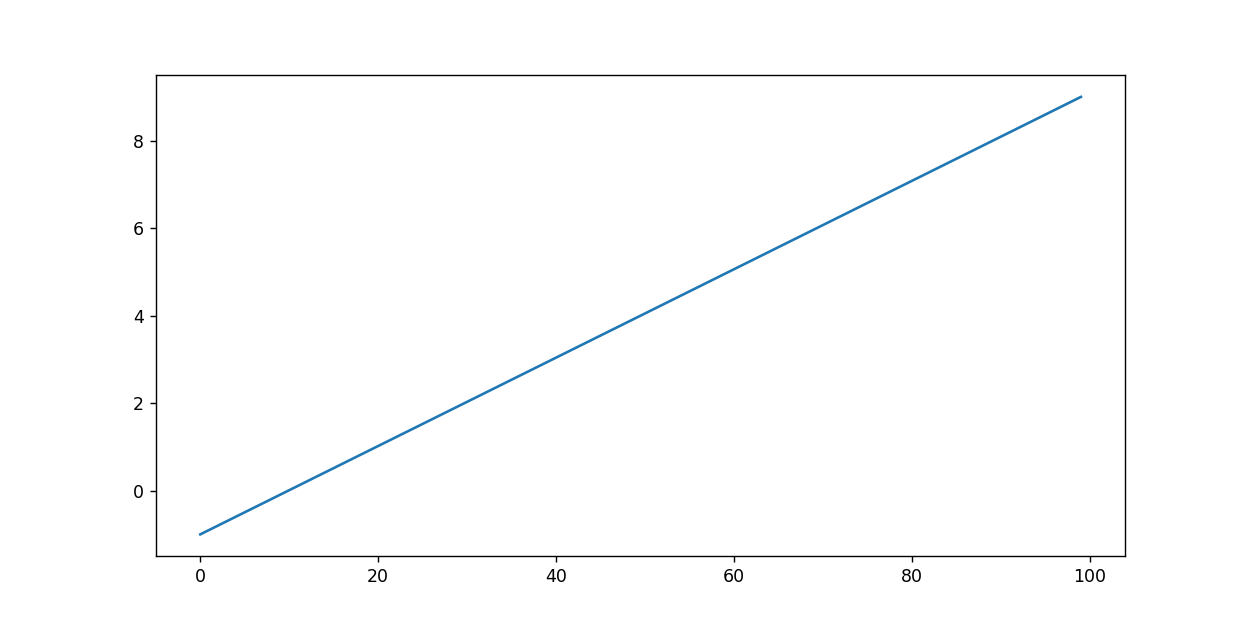

In [13]:
ncfile = 'Run3.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    zb = ds.variables['zb'][...]
    #pickup = ds.variables['pickup_sum'][...]
    print(Ct.shape)
    
    # create figure
    fig, ax = plt.subplots(figsize=(10,5))
    
    # plot bed levels and bed level change
#     p = ax.pcolormesh(x, y, zb[2,:,:])
#     cb = fig.colorbar(p, shrink=.7)
    
#     #ax.contour(y, x, zb[0,:,:], [0.], colors=['k'])
        
#     ax.set_aspect('equal', adjustable='box')
            
#     ax.set_xlabel('alongshore distance [m]')
#     ax.set_ylabel('cross-shore distance [m]')

    p = ax.plot(zb[2,5,:])


(79, 10, 100)


<IPython.core.display.Javascript object>


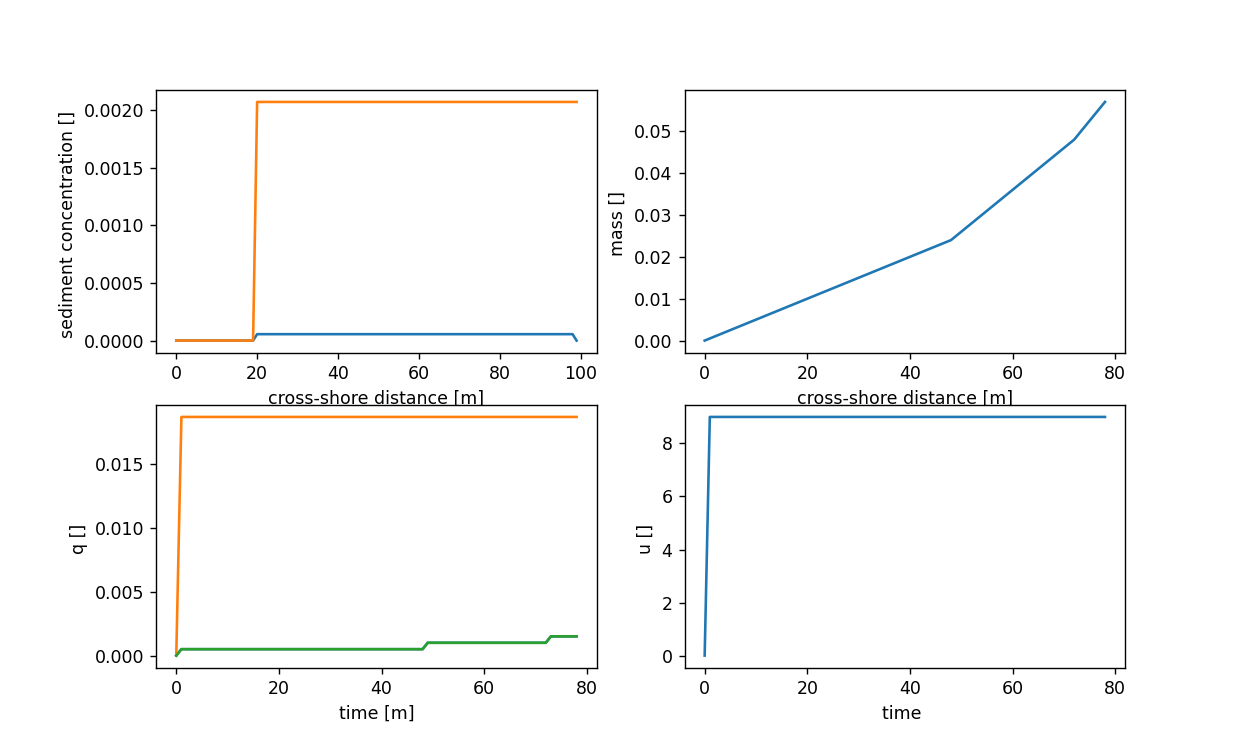

0.0005000000237487257
0.018646534765139222


In [30]:
ncfile = 'Run3.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    pickup = ds.variables['pickup'][...]
    uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    qs= ds.variables['qs'][...]
    qn= ds.variables['qn'][...]

    q= ds.variables['q'][...]

    print(uw.shape)
    
    # create figure
    fig, ax = plt.subplots(2,2,figsize=(10,6))
    
    ax[0,0].plot(np.transpose(Ct[35,5,:,0]))
    ax[0,0].plot(np.transpose(Cu[35,5,:,0]))
    ax[0,0].set_ylabel('sediment concentration [] ')
    ax[0,0].set_xlabel('cross-shore distance [m]')
    
    #ax[0,1].plot(np.transpose(mass[:,5,:,0,0]))#-supply[5,:]))
    ax[0,1].plot(qs[:,5,-2,0].cumsum())#-supply[5,:]))
    ax[0,1].set_ylabel('mass [] ')
    ax[0,1].set_xlabel('cross-shore distance [m]')
    
        
    ax[1,0].plot(q[:,5,-2,0])
    ax[1,0].plot(Cu[:,5,-2,0]*uw[:,5,-2])
    ax[1,0].plot(qs[:,5,-2,0])
    print(q[20,5,-2,0])
    print(Cu[20,5,-2,0]*uw[20,5,-2])
    
    ax[1,0].set_ylabel('q [] ')
    ax[1,0].set_xlabel('time [m]')    
                     
    ax[1,1].plot(uw[:,5,0])
    #ax[1,1].plot(mass[:,5,19,0,0])
    ax[1,1].set_ylabel('u [] ')
    ax[1,1].set_xlabel('time ')

<IPython.core.display.Javascript object>


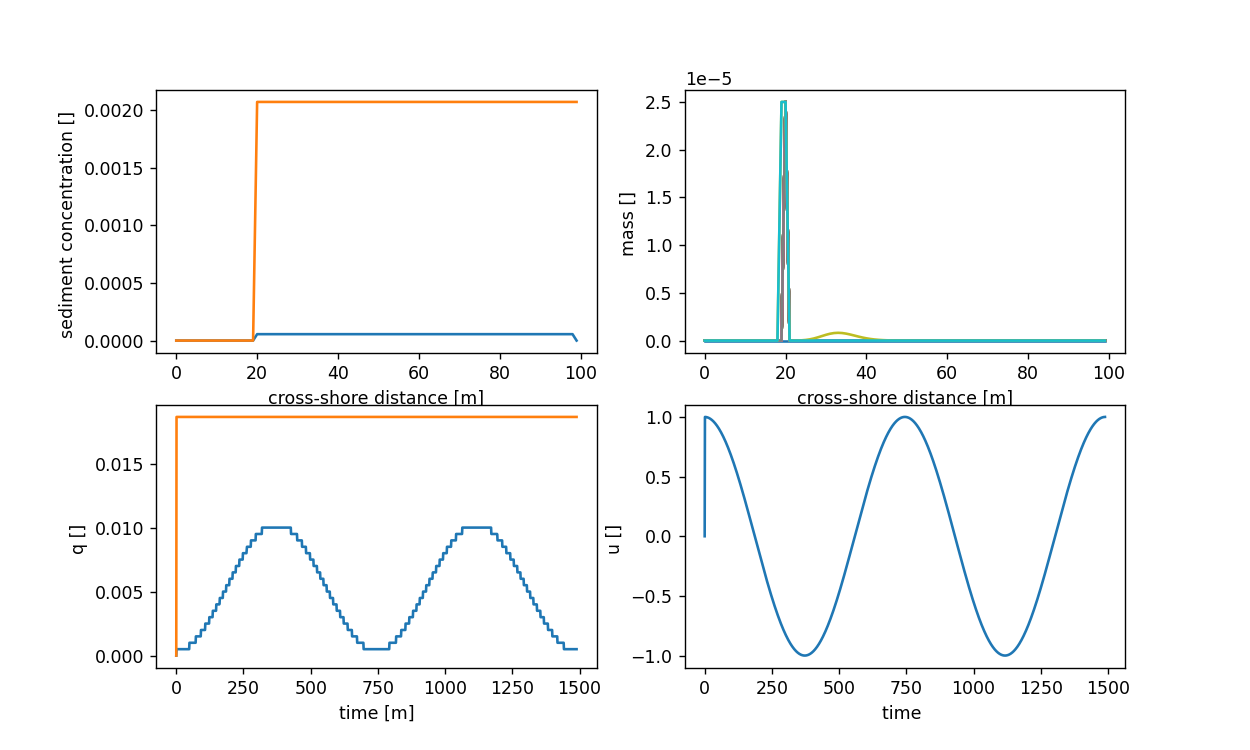

0.0005000000237487257
0.018646534765139222
(1490, 10, 100)


In [6]:
ncfile = 'Run3.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    pickup = ds.variables['pickup'][...]
    uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    u= ds.variables['uw'][...]
    q= ds.variables['q'][...]
    zs= ds.variables['zs'][...]

    #u= ds.variables['u'][...]
    #rint(uth)

    #pickup = ds.variables['pickup_sum'][...]
    #print(np.squeeze(zb).shape)
    #print(q.shape)
    
    # create figure
    fig, ax = plt.subplots(2,2,figsize=(10,6))
    
   # ax[0,0].plot(np.transpose(Ct[85,5,:,0]))
    #ax[0,0].plot(np.transpose(Cu[85,5,:,0]))    
   # ax[0,0].plot(np.transpose(Ct[38,5,:,0]))
   # ax[0,0].plot(np.transpose(Cu[38,5,:,0]))    
    ax[0,0].plot(np.transpose(Ct[35,5,:,0]))
    ax[0,0].plot(np.transpose(Cu[35,5,:,0]))
    ax[0,0].set_ylabel('sediment concentration [] ')
    ax[0,0].set_xlabel('cross-shore distance [m]')
    
#    ax[0,1].plot(np.transpose(mass[1:10,50,:,0,0]-supply[50,:]))
    ax[0,1].plot(np.transpose(mass[0:50,5,:,0,0]))#-supply[5,:]))
    #ax[0,1].plot(np.transpose((supply[5,:])))
    ax[0,1].set_ylabel('mass [] ')
    ax[0,1].set_xlabel('cross-shore distance [m]')
    
        
    ax[1,0].plot(q[:,5,-2,0])
    ax[1,0].plot(Cu[:,5,-2,0]*uw[:,5,-2])
    print(q[20,5,-2,0])
    print(Cu[20,5,-2,0]*uw[20,5,-2])
    
    ax[1,0].set_ylabel('q [] ')
    ax[1,0].set_xlabel('time [m]')    
    
    print(zs.shape)
    ax[1,1].plot(zs[:,5,0])
    #ax[1,1].plot(mass[:,5,19,0,0])
    ax[1,1].set_ylabel('u [] ')
    ax[1,1].set_xlabel('time ')

<IPython.core.display.Javascript object>


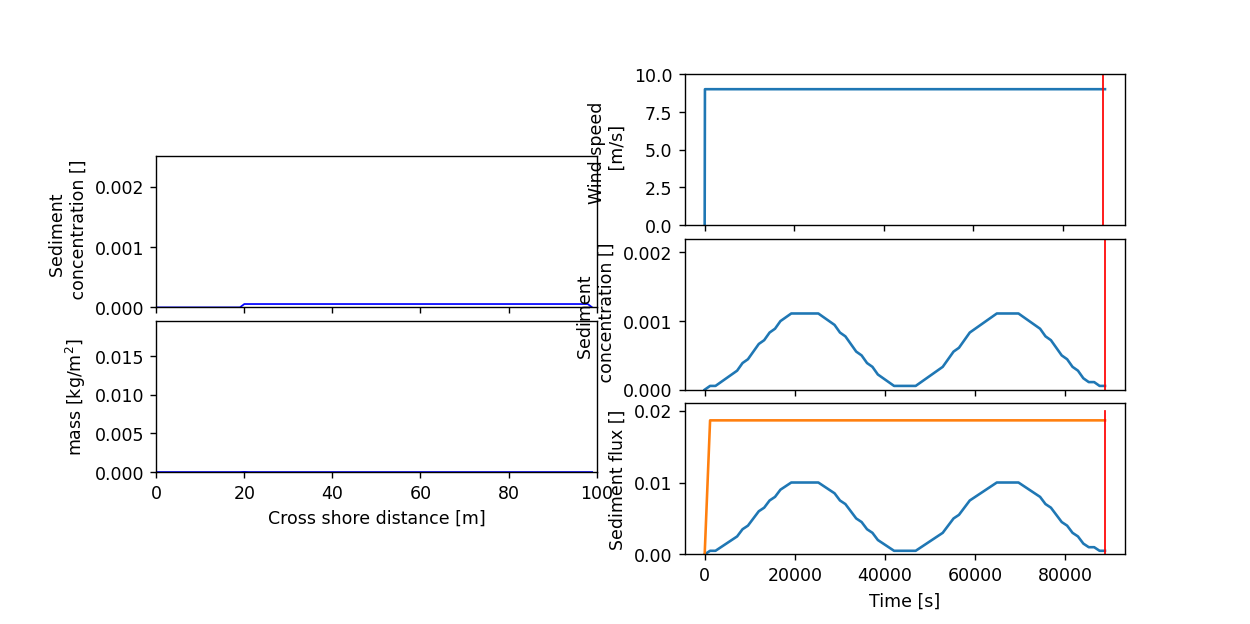

In [4]:

#plots 
fig = plt.figure(figsize=(14, 6))
gs = plt.GridSpec(nrows=6, ncols=2)

#many timesteps need to be made less course by a factor
tt=20


ax0 = fig.add_subplot(gs[1:3, 0])
ax0.set_xlim(( 0, 100))            
ax0.set_ylim((0, 0.0025))
ax0.set_ylabel('Sediment \n concentration []')
#ax0.set_xlabel(None)
line1, = ax0.plot([], [], 'b', lw=1) 
ax0.set_yticks([0,0.001,0.002])
ax0.set_xticklabels([])

ax1 = fig.add_subplot(gs[3:5, 0])
ax1.set_xlim(( 0, 100))            
ax1.set_ylim((0, 0.0195))
ax1.set_ylabel('mass [kg/m$^2$]')
ax1.set_xlabel('Cross shore distance [m]')
line2, = ax1.plot([], [], 'b', lw=1) 

ax2 = fig.add_subplot(gs[0:2, 1])
ax2.plot(t,uw[:,5,0])
ax2.set_ylabel('Wind speed \n [m/s]')
ax2.set_xticklabels([])
ax2.set_ylim([0, 10])
#ax2.set_xlim([0, 175])

line3, = ax2.plot([], [], 'r', lw=1) 

ax3 = fig.add_subplot(gs[2:4, 1])
ax3.plot(t[range(0,t.size-1,tt)],Ct[range(0,t.size-1,tt),5,-2,0])
ax3.set_ylabel('Sediment \n concentration []')
ax3.set_xticklabels([])
#ax3.yticks([0.001])
ax3.set_yticks([0,0.001,0.002])
ax3.set_ylim([0, 0.0022])
#ax3.set_xlim([0, 175])

line4, = ax3.plot([], [], 'r', lw=1) 

ax4 = fig.add_subplot(gs[4:6, 1])
ax4.plot(t[range(0,t.size-1,tt)],q[range(0,t.size-1,tt),5,-2,0])
ax4.plot(t[range(0,t.size-1,tt)],Cu[range(0,t.size-1,tt),5,-2,0]*uw[range(0,t.size-1,tt),5,-2])
ax4.set_ylabel('Sediment flux []')
ax4.set_xlabel('Time [s]')
ax4.set_ylim([0, 0.021])
#ax4.set_xlim([0, 175])
line5, = ax4.plot([], [], 'r', lw=1) 



def drawframe(n,*fargs):
    #print(n)
    #print(Ct[n,5,:,0].shape)
    line1.set_data(x[5,:],Ct[n,5,:,0])
    line2.set_data(x[5,:],mass[n,5,:,0])
    line3.set_data((t[n],t[n]),(0,10))
    line4.set_data((t[n],t[n]),(0,0.003))
    line5.set_data((t[n],t[n]),(0,0.02))
    
    
    return line1,line2,line3,line4,line5,

fig.set_size_inches(10, 5)
anim = animation.FuncAnimation(fig, drawframe, fargs=("Ct","mass","t","x"), frames=range(0,t.size-1,tt), interval=200, blit=True, repeat=False )


In [5]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [22]:
#now lets create the animations for the presentation
fig.set_size_inches(14, 6)
anim.save('supply_limited.mp4')

<IPython.core.display.Javascript object>


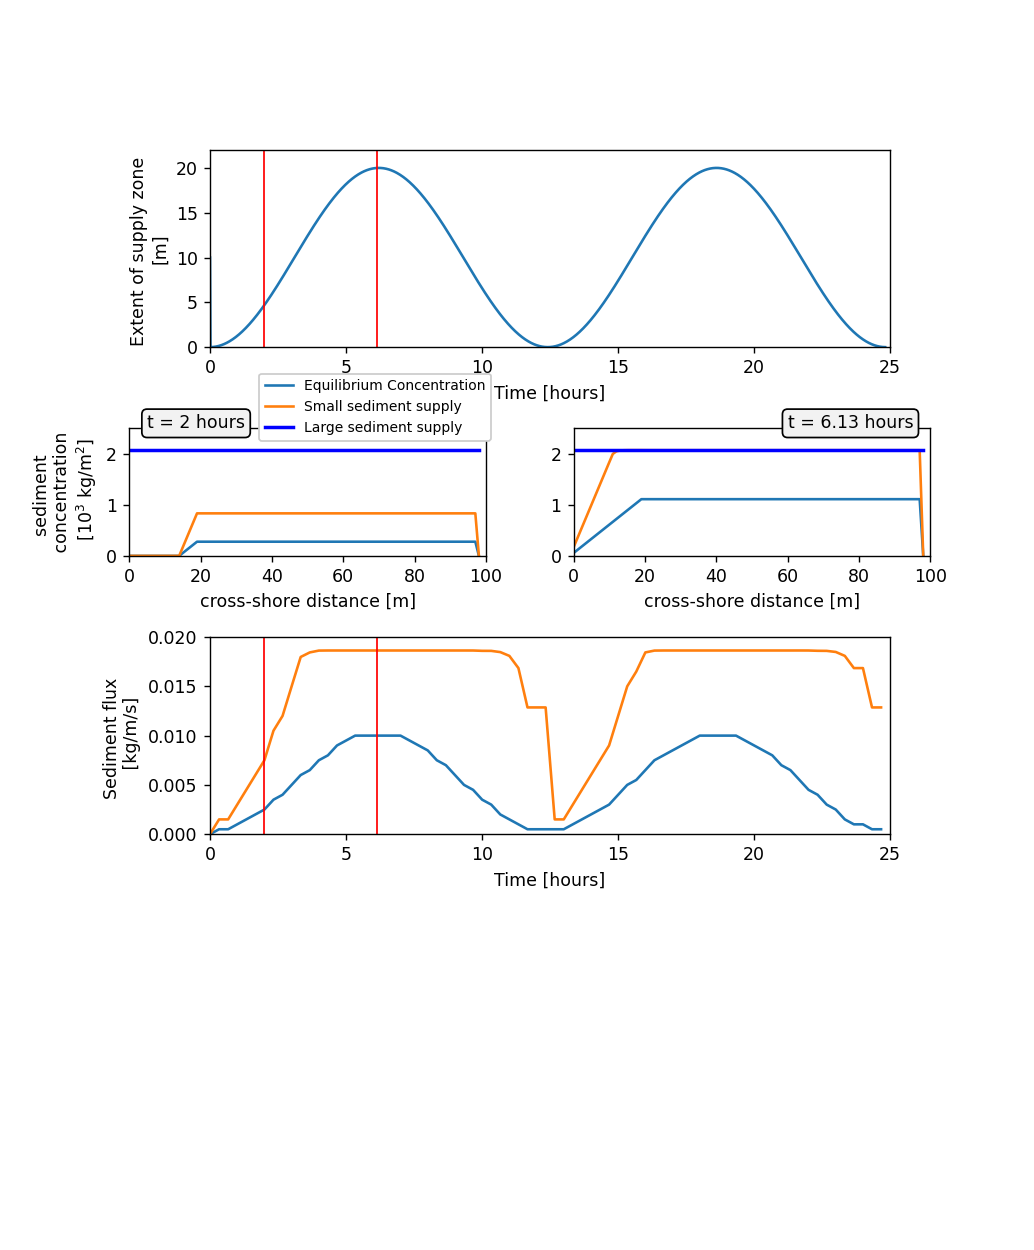

Text(0, 0.5, 'Sediment flux \n [kg/m/s]')

In [3]:
ncfile = 'Run3.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    pickup = ds.variables['pickup'][...]
    uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    q= ds.variables['q'][...]
    zs= ds.variables['zs'][...]
    
ncfile = 'Run3b.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    Ct_ls = ds.variables['Ct'][...]
    mass_ls = ds.variables['mass'][...]
    q_ls = ds.variables['q'][...]

        
   
    


# create figure
#lets go a4
#fig = plt.figure(figsize=(8.27,11.69))
fig = plt.figure(figsize=(8.27,10))

gs = plt.GridSpec(nrows=14, ncols=20)

#lets place this one at the top.
ax0 = fig.add_subplot(gs[0:3, 2:19])
ax0.plot(t/3600,(zs[:,5,0]+1)*-10+20)
ax0.plot([2, 2],[0, 30],'r',lw=1)
ax0.plot([6.125, 6.125],[0, 30],'r',lw=1)
ax0.set_ylabel('Extent of supply zone \n[m]')
ax0.set_xlabel('Time [hours]')
ax0.set_ylim([0, 22])
ax0.set_xlim([0, 90e3/3600])


ax1 = fig.add_subplot(gs[4:6, 0:9])
ax1.plot(np.transpose(Ct[120,5,1:,0])*1e3)
ax1.plot(np.transpose(Ct_ls[120,5,1:,0])*1e3)
ax1.plot(np.transpose(Cu[330,5,1:,0])*1e3, 'b', lw = 2)
ax1.set_xlabel('cross-shore distance [m]')
ax1.set_xlim(( 0, 100))    

bbox = dict(boxstyle="round", fc="0.95")
ax1.annotate('t = 2 hours',[5,2.5],bbox = bbox)
#ax1.set_xticklabels([])
ax1.set_ylim((0, 2.5))
ax1.set_ylabel('sediment \n concentration \n [10$^3$ kg/m$^2$]')

ax2 = fig.add_subplot(gs[4:6, 11:20])
ax2.plot(np.transpose(Ct[360,5,1:,0])*1e3)
ax2.plot(np.transpose(Ct_ls[360,5,1:,0])*1e3)
ax2.plot(np.transpose(Cu[360,5,1:,0])*1e3, 'b', lw = 2)
ax2.set_xlabel('cross-shore distance [m]')
ax2.set_xlim(( 0, 100))    
ax2.annotate('t = 6.13 hours',[60,2.5],bbox = bbox)
#ax2.set_xticklabels([])
ax2.set_ylim((0, 2.5))  

ax2.legend(['Equilibrium Concentration','Small sediment supply','Large sediment supply'],
          loc='lower left', ncol=1, framealpha=1, prop={'size': 8}, bbox_to_anchor=(-0.9, 0.85))


tt = 20
ax8 = fig.add_subplot(gs[7:10, 2:19])
ax8.plot(t[0:-1:tt]/3600,q[0:-1:tt,5,-2,0])
ax8.plot(t[0:-1:tt]/3600,q_ls[0:-1:tt,5,-2,0])
#ax8.plot(t[0:-1:tt]/3600,Cu[0:-1:tt,5,-2,0]*uw[0:-1:tt,5,-2])
ax8.set_xlim([0, 90e3/3600])
ax8.set_ylim([0, 0.02])
ax8.plot([6.125, 6.125],[0, 30],'r',lw=1)
ax8.plot([2, 2],[0, 30],'r',lw=1)
ax8.set_xlabel('Time [hours]')
ax8.set_ylabel('Sediment flux \n [kg/m/s]')






<IPython.core.display.Javascript object>


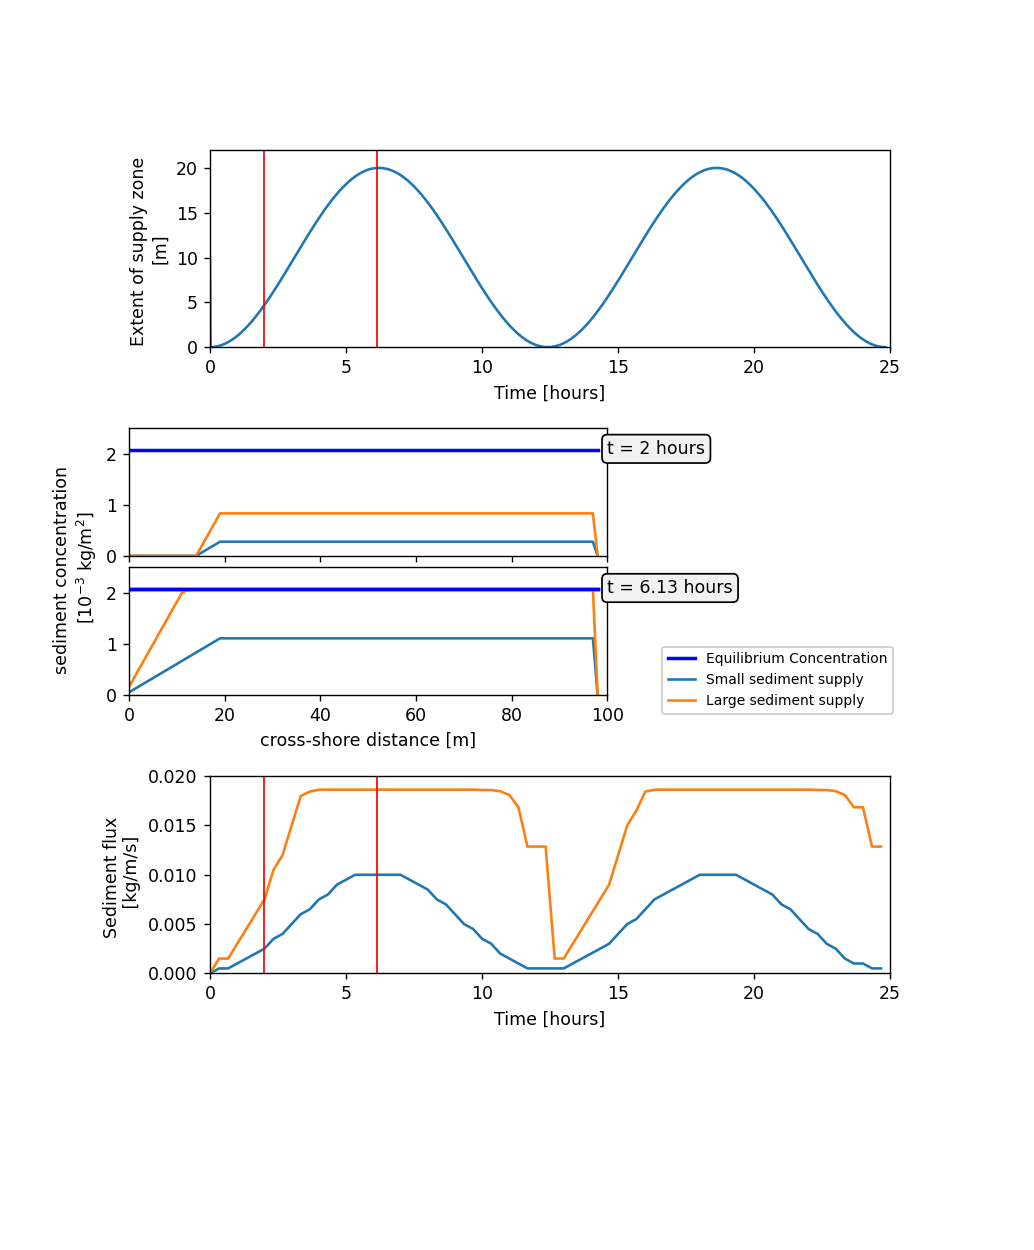

Text(0, 0.5, 'Sediment flux \n [kg/m/s]')

In [57]:
ncfile = 'Run3.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    pickup = ds.variables['pickup'][...]
    uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    q= ds.variables['q'][...]
    zs= ds.variables['zs'][...]
    
ncfile = 'Run3b.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    Ct_ls = ds.variables['Ct'][...]
    mass_ls = ds.variables['mass'][...]
    q_ls = ds.variables['q'][...]

        
   
    


# create figure
#lets go a4
#fig = plt.figure(figsize=(8.27,11.69))
fig = plt.figure(figsize=(8.27,10))

gs = plt.GridSpec(nrows=14, ncols=20)

#lets place this one at the top.
ax0 = fig.add_subplot(gs[0:3, 2:19])
ax0.plot(t/3600,(zs[:,5,0]+1)*-10+20)
ax0.plot([2, 2],[0, 30],'r',lw=1)
ax0.plot([6.125, 6.125],[0, 30],'r',lw=1)
ax0.set_ylabel('Extent of supply zone \n[m]')
ax0.set_xlabel('Time [hours]')
ax0.set_ylim([0, 22])
ax0.set_xlim([0, 90e3/3600])


ax1 = fig.add_subplot(gs[4:6, 0:12])
ax1.plot(np.transpose(Cu[330,5,1:,0])*1e3, 'b', lw = 2)
ax1.plot(np.transpose(Ct[120,5,1:,0])*1e3)
ax1.plot(np.transpose(Ct_ls[120,5,1:,0])*1e3)
ax1.set_xlabel('cross-shore distance [m]')
ax1.set_xlim(( 0, 100))    

bbox = dict(boxstyle="round", fc="0.95")
ax1.annotate('t = 2 hours',[100,2],bbox = bbox)
ax1.set_xticklabels([])
ax1.set_ylim((0, 2.5))

ax2 = fig.add_subplot(gs[6:8, 0:12])
ax2.plot(np.transpose(Cu[360,5,1:,0])*1e3, 'b', lw = 2)
ax2.plot(np.transpose(Ct[360,5,1:,0])*1e3)
ax2.plot(np.transpose(Ct_ls[360,5,1:,0])*1e3)
ax2.plot(np.transpose(Cu[360,5,1:,0])*1e3, 'b', lw = 2)
ax2.set_xlabel('cross-shore distance [m]')
ax2.set_xlim(( 0, 100))    
ax2.annotate('t = 6.13 hours',[100,2],bbox = bbox)
ax2.set_ylabel('sediment concentration \n[10$^{-3}$ kg/m$^2$]',horizontalalignment='center', y=1)


ax2.set_ylim((0, 2.5))  

ax2.legend(['Equilibrium Concentration','Small sediment supply','Large sediment supply'],
          loc='lower left', ncol=1, framealpha=1, prop={'size': 8}, bbox_to_anchor=(1.1, -0.2))


tt = 20
ax8 = fig.add_subplot(gs[9:12, 2:19])
ax8.plot(t[0:-1:tt]/3600,q[0:-1:tt,5,-2,0])
ax8.plot(t[0:-1:tt]/3600,q_ls[0:-1:tt,5,-2,0])
#ax8.plot(t[0:-1:tt]/3600,Cu[0:-1:tt,5,-2,0]*uw[0:-1:tt,5,-2])
ax8.set_xlim([0, 90e3/3600])
ax8.set_ylim([0, 0.02])
ax8.plot([6.125, 6.125],[0, 30],'r',lw=1)
ax8.plot([2, 2],[0, 30],'r',lw=1)
ax8.set_xlabel('Time [hours]')
ax8.set_ylabel('Sediment flux \n [kg/m/s]')



#i want to group the two middle frames on the left and make a legend on he right.



In [58]:
fig.savefig('Run3.png')